c:\Users\Liam\anaconda3\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Liam\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Liam\anaconda3\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Liam\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


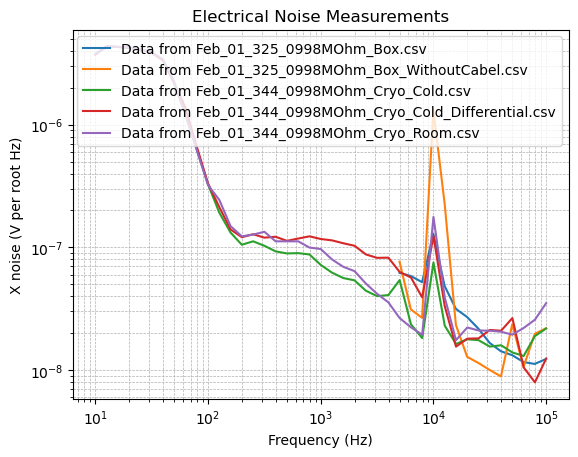

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get a list of all CSV files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith(".csv")] 

# Directly use the file name, as the files are in the current directory

avg_values = []


# Loop through each CSV file and plot the data
for file in csv_files:
    # Directly use the file name
    df = pd.read_csv(file)

    x_values = df['Frequency (Hz) - Plot 0']
    y_values = df['X noise (V per root Hz) - Plot 0']

    avg_values.append(np.average(y_values[15:20]))

    plt.loglog(x_values, y_values, label=f'Data from {file}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Electrical Noise Measurements')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

#plt.xlim(200, 1000)
plt.show()

In [15]:
avg_values = np.array(avg_values)
avg_values = np.sort(avg_values)

In [64]:
print(avg_values)

[6.496e-08 8.952e-08 1.216e-07 1.452e-07]


Text(0, 0.5, 'Noise V per root Hz)')

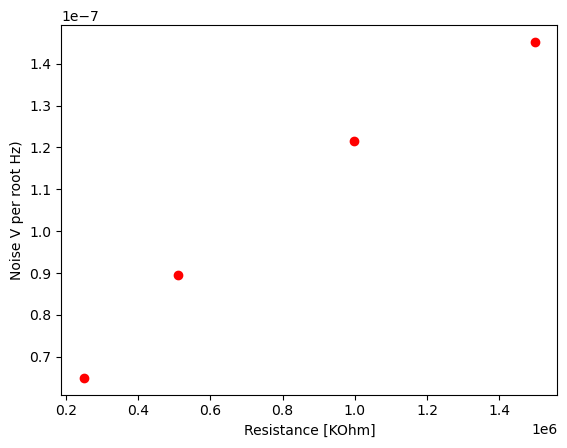

In [65]:
resistances = [250*10**3,510*10**3,998*10**3,1498*10**3]

plt.plot(resistances,avg_values,'ro')
plt.xlabel("Resistance [KOhm]")
plt.ylabel("Noise V per root Hz)")

In [13]:
avg_squared = avg_values**2

# Fit a linear regression line (1st-degree polynomial)
coefficients = np.polyfit(resistances, avg_squared, 1)

# The first coefficient represents the slope of the line
slope = coefficients[0]

print("Slope of the line:", slope)

x = np.linspace(200*10**3,1500*10**3)
# Generate predicted values for the fitted line
predicted_y = np.polyval(coefficients, x)

# Plot the data points and the fitted line
plt.scatter(resistances,avg_squared , label='Data')
plt.plot(x, predicted_y, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Fitted Line Plot')
plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [67]:
four_k_t_measured = slope
four_k_t_actual = 4*1.38*10**-23*295.5

In [68]:
four_k_t_actual

1.63116e-20

In [69]:
percent_error = np.abs((four_k_t_measured - four_k_t_actual) / four_k_t_actual) * 100
print(percent_error)

17.167391211142462


In [74]:
Boltzmann_const = slope/(4*(273+21.6))

In [75]:
Boltzmann_const

1.1465821295997356e-23